# STAT 527 - Final Project - Implementation of Various Lasso Solvers
## John Ash (1427253)



## Imports and Data Preparation
#### Note: python version used = *2.7*


In [1]:
import pandas as pd
import numpy as np

In [2]:
from lasso_utils import *
from lasso_solvers_general import *
from lasso_solvers_warm_start import *
from lasso_solvers_strong_rules import *

In [3]:
# read in the datasets (assuming they are in the current working directory)
data_hitters = pd.read_csv("HittersCoded.csv", sep=",")
data_news_popularity = pd.read_csv("OnlineNewsPopularity.csv", sep=',')

# get the col_names of the hitters set for a graph later
hitters_headers = list(data_hitters.columns.values)
hitters_headers.remove("Salary")
    
# convert the data to numpy arrays
data_hitters = data_hitters.as_matrix(columns=None)  
data_news_popularity = data_news_popularity.as_matrix(columns=None)[:,range(2, 61)] 
data_news_popularity

array([[12.0, 219.0, 0.663594466988, ..., 0.0, 0.1875, 593L],
       [9.0, 255.0, 0.604743080614, ..., 0.5, 0.0, 711L],
       [9.0, 211.0, 0.575129530699, ..., 0.5, 0.0, 1500L],
       ..., 
       [10.0, 442.0, 0.5163551389800001, ..., 0.0454545454545,
        0.13636363636399998, 1900L],
       [6.0, 682.0, 0.5394932927880001, ..., 0.5, 0.0, 1100L],
       [10.0, 157.0, 0.7019867503180001, ..., 0.166666666667, 0.25, 1300L]], dtype=object)

In [4]:
# load the data into the design matrix and the y vector
# center and scale the X variables that are NOT categorical, center the y

data_hitters_center = center_data(data_hitters, np.append(range(0,13),range(15,19))) 
data_news_popularity_center = center_data(data_news_popularity, np.append(np.append(np.append(range(0, 3),range(4,11)), range(17,29)),range(37,59)))

# don't scale y
data_hitters_new = scale_data(data_hitters_center,np.append(range(0,13),range(15,18)))
data_news_popularity_new = scale_data(data_news_popularity_center, np.append(np.append(np.append(range(0, 3),range(4,11)), range(17,29)),range(37,58)))

# get the design matrix and y vector for the hitters data
X_hitters  = data_hitters_new[:, np.append(range(0,18),19)]
Y_hitters = data_hitters_center[:,18]

# get the design matrix and y vector for the news popularity data
X_news_popularity = data_news_popularity_new[:, np.append(np.append(range(0, 11),range(17, 29)), range(36,58))]
Y_news_popularity = data_news_popularity_center[:, 58]

In [5]:
# check the shapes (dims of the matrices)
print X_hitters.shape, Y_hitters.shape, X_news_popularity.shape, Y_news_popularity.shape

(263L, 19L) (263L,) (39644L, 45L) (39644L,)


## Part I - First, let's compute the least squares solution (i.e., if $\lambda$=0) for the hitters dataset using the conventional OLS method i.e., $\hat{\beta}=(X^TX)^{-1}X^Ty$
**Note:** No $\beta_0$ for now since we standardized the data

In [6]:
hitters_ls_coeffs = np.dot(np.linalg.inv(np.dot(np.transpose(X_hitters),X_hitters)), np.dot(np.transpose(X_hitters),Y_hitters))
print hitters_ls_coeffs

[-297.45614955  340.48615963   35.5403775   -53.9418678   -20.28982787
  130.79279051   -8.83289706 -404.38657357   61.26966422  -14.75224879
  513.11185802  260.80799272 -214.08784371   79.36067372  -87.97237503
   78.40575231   55.5326767   -23.720395    -11.07432163]


### Now, let's compute the least squares solution (i.e., if $\lambda$=0) for the hitters dataset, but use the following three implemented algorithms:
1. Shooting Algorithm
2. Iterative Soft Thresholding Algorithm (ISTA)
3. Fast Iterative Soft Thresholding Algorithm (FISTA) <br />
**Note:** Again, no $\beta_0$ for now since we standardized the data

### Estimate of $\hat{\beta}$ from Shooting Algorithm (with $\lambda$=0)

In [8]:
beta_hat_0s = lasso_shooting(X_hitters, Y_hitters, 0, 0.0001)
print beta_hat_0s

[-297.20800574  340.12179934   35.46760136  -53.77542078  -20.2364232
  130.72648376   -8.68246168 -406.38721039   64.09950836  -14.22468684
  512.21721936  260.02084368 -213.80038649   79.40874695  -87.96998056
   78.39801934   55.57616968  -23.74049309  -11.12360477]


### Estimate of $\hat{\beta}$ from ISTA Algorithm (with $\lambda$=0)

In [9]:
beta_hat_0i = iterative_soft_thresholding_lasso_solver(X_hitters, Y_hitters, 0, 0.0001, 0.0001)
print beta_hat_0i

[-302.12572649  337.33219817   29.4299594   -46.21579607  -14.06231885
  129.99651275  -13.98150132 -376.15761215  110.83819342   15.31806719
  460.1786842   207.93021949 -207.85764206   80.23647025  -88.08002093
   78.58952437   55.11009613  -24.19056747  -12.38164815]


### Estimate of $\hat{\beta}$ from FISTA Algorithm (with $\lambda$=0)

In [10]:
beta_hat_0f = fast_iterative_soft_thresholding_lasso_solver(X_hitters, Y_hitters, 0, 0.0001, 0.0001)
print beta_hat_0f

[-297.06541531  340.17397704   35.61404292  -53.98126413  -20.37068926
  130.74812649   -8.56168567 -406.89786543   62.5182212   -15.05256575
  513.7190991   261.42272643 -213.99976161   79.4327735   -87.9672546
   78.39543851   55.58031732  -23.73010144  -11.13583562]


### Recover the intercept $\beta_0$ for the FISTA case

In [11]:
beta_0_fista = calc_b_0(data_hitters[:,18], data_hitters[:,np.append(range(0,18),19)], beta_hat_0f)
print beta_0_fista # value very large since all predictors are included in model and many coefficients have large (in absolute value) magnitude

873859.573994


## Part II - Now, let's compute the solution for a very large $\lambda$ for the hitters dataset and use the same three implemented algorithms. We expect to see (and do) that all $\hat{\beta}_j=0$

In [12]:
# first compute lambda_max
lam_max = 2*np.max(np.abs(np.dot(np.transpose(X_hitters),Y_hitters)))
print lam_max

134278.382763


### Estimate of $\hat{\beta}$ from Shooting Algorithm (with $\lambda$=$\lambda_{max}$)

In [13]:
beta_hat_ms = lasso_shooting(X_hitters, Y_hitters, lam_max, 0.0001)
print beta_hat_ms

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.
 -0.]


### Estimate of $\hat{\beta}$ from ISTA Algorithm (with $\lambda$=$\lambda_{max}$)

In [14]:
# use 0.5*lam_max here since the lasso loss used in this case has a leading 1/2 unlike that in Murphy (2012), the reference for the shooting algo
beta_hat_mi = iterative_soft_thresholding_lasso_solver(X_hitters, Y_hitters, 0.5*lam_max, 0.0001, 0.0001)
print beta_hat_mi

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.
 -0.]


### Estimate of $\hat{\beta}$ from FISTA Algorithm (with $\lambda$=$\lambda_{max}$)

In [15]:
# use 0.5*lam_max here since the lasso loss used in this case has a leading 1/2 unlike that in Murphy (2012), the reference for the shooting algo
beta_hat_mf = fast_iterative_soft_thresholding_lasso_solver(X_hitters, Y_hitters, lam_max, 0.0001, 0.0001)
print beta_hat_mf

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.
 -0.]


### Part III - Now, let's compute the solution for an *intermediate value* of  $\lambda$ for the hitters dataset and use the same three implemented algorithms. Here, we will also show the verbose output to demonstrate number of iterations to convergence etc.

In [16]:
# first set an intermediate value of lambda
lam_intermed = 200

### Estimate of $\hat{\beta}$ from Shooting Algorithm (with $\lambda$=200)

In [17]:
beta_hat_ms = lasso_shooting(X_hitters, Y_hitters, lam_intermed, 0.0001,True)
print beta_hat_ms

Iter 1 done, l2^2=79239.638, Loss=33872036.669
Iter 2 done, l2^2=11868.738, Loss=30794381.411
Iter 3 done, l2^2=3797.352, Loss=29816499.949
Iter 4 done, l2^2=2713.117, Loss=29120614.288
Iter 5 done, l2^2=2161.545, Loss=28565576.105
Iter 6 done, l2^2=1699.447, Loss=28124986.340
Iter 7 done, l2^2=1388.413, Loss=27763197.785
Iter 8 done, l2^2=1148.574, Loss=27462992.061
Iter 9 done, l2^2=960.461, Loss=27211597.017
Iter 10 done, l2^2=776.057, Loss=27004822.187
Iter 11 done, l2^2=653.156, Loss=26833533.733
Iter 12 done, l2^2=554.384, Loss=26688032.883
Iter 13 done, l2^2=472.890, Loss=26563837.200
Iter 14 done, l2^2=406.087, Loss=26457144.950
Iter 15 done, l2^2=351.553, Loss=26364752.176
Iter 16 done, l2^2=303.686, Loss=26284925.937
Iter 17 done, l2^2=263.955, Loss=26215538.598
Iter 18 done, l2^2=230.870, Loss=26154850.685
Iter 19 done, l2^2=203.183, Loss=26101446.715
Iter 20 done, l2^2=179.922, Loss=26054164.344
Iter 21 done, l2^2=160.342, Loss=26012035.405
Iter 22 done, l2^2=143.809, Loss=

### Estimate of $\hat{\beta}$ from ISTA Algorithm (with $\lambda$=200)

In [18]:
beta_hat_mi = iterative_soft_thresholding_lasso_solver(X_hitters, Y_hitters, lam_intermed, 0.0001, 0.0001, True)
print beta_hat_mi

Iter 0 done, l2^2=422.323, Lasso Loss=22832485.595
Iter 1 done, l2^2=278.903, Lasso Loss=20303482.502
Iter 2 done, l2^2=184.749, Lasso Loss=18626769.328
Iter 3 done, l2^2=122.900, Lasso Loss=17510025.616
Iter 4 done, l2^2=82.239, Lasso Loss=16761496.339
Iter 5 done, l2^2=55.477, Lasso Loss=16255390.867
Iter 6 done, l2^2=37.837, Lasso Loss=15909146.816
Iter 7 done, l2^2=26.186, Lasso Loss=15668543.253
Iter 8 done, l2^2=18.471, Lasso Loss=15497946.121
Iter 9 done, l2^2=13.344, Lasso Loss=15373915.431
Iter 10 done, l2^2=9.921, Lasso Loss=15281014.777
Iter 11 done, l2^2=7.622, Lasso Loss=15209063.776
Iter 12 done, l2^2=6.064, Lasso Loss=15151336.035
Iter 13 done, l2^2=4.998, Lasso Loss=15103376.805
Iter 14 done, l2^2=4.257, Lasso Loss=15062226.882
Iter 15 done, l2^2=3.733, Lasso Loss=15025912.883
Iter 16 done, l2^2=3.355, Lasso Loss=14993112.249
Iter 17 done, l2^2=3.075, Lasso Loss=14962932.901
Iter 18 done, l2^2=2.861, Lasso Loss=14934768.163
Iter 19 done, l2^2=2.693, Lasso Loss=14908201.

### Estimate of $\hat{\beta}$ from FISTA Algorithm (with $\lambda$=200)

In [20]:
beta_hat_mf = fast_iterative_soft_thresholding_lasso_solver(X_hitters, Y_hitters, lam_intermed, 0.0001, 0.0001, True)
print beta_hat_mf

Iter 1 done, l2^2=422.323, Lasso Loss=22832485.595
Iter 2 done, l2^2=435.787, Lasso Loss=19752481.456
Iter 3 done, l2^2=384.702, Lasso Loss=17593336.116
Iter 4 done, l2^2=296.548, Lasso Loss=16274072.470
Iter 5 done, l2^2=201.895, Lasso Loss=15576497.529
Iter 6 done, l2^2=123.136, Lasso Loss=15257026.730
Iter 7 done, l2^2=70.147, Lasso Loss=15119394.508
Iter 8 done, l2^2=41.958, Lasso Loss=15041287.132
Iter 9 done, l2^2=31.536, Lasso Loss=14966557.475
Iter 10 done, l2^2=30.658, Lasso Loss=14881568.731
Iter 11 done, l2^2=33.035, Lasso Loss=14791348.046
Iter 12 done, l2^2=35.297, Lasso Loss=14703802.174
Iter 13 done, l2^2=36.446, Lasso Loss=14623147.671
Iter 14 done, l2^2=36.740, Lasso Loss=14549603.673
Iter 15 done, l2^2=36.727, Lasso Loss=14481536.143
Iter 16 done, l2^2=36.742, Lasso Loss=14417405.128
Iter 17 done, l2^2=36.831, Lasso Loss=14356541.522
Iter 18 done, l2^2=36.733, Lasso Loss=14299397.366
Iter 19 done, l2^2=36.536, Lasso Loss=14246174.730
Iter 20 done, l2^2=36.206, Lasso L

### Part IV - Let's compute and plot the solution path for a grid of $\lambda$ values ranging from $10^{-2}$ to ~134,000, with 6 values that are spaced exponentially. Again, we consider the hitters dataset, but will now just focus on the FISTA algorithm. We note that the algorithm applied here also makes use of *warm starts* and uses the same maximum value of $\lambda$ as shown above. In each 2D array, the values are as follows:
- Index 0: $\lambda$
- Index 1: # iterations to converge
- Indices 2:p: Standardized coefficent value $\hat{\beta}_j$

In [21]:
# note that 9999 is a default value that means to use the calculated lambda_max
warm_start_fista_lam_grid = warm_start_FISTA_lasso_solver(X_hitters, Y_hitters, 0.0001, 0.0001, 6, 10.**-2, lam_max=9999)
print warm_start_fista_lam_grid

[[  6.71391914e+04   3.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   5.32907052e-15   0.00000000e+00  -0.00000000e+00
   -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   -0.00000000e+00]
 [  2.89454886e+03   5.07000000e+02  -0.00000000e+00   9.28476566e+01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   4.86229507e+01
   -0.00000000e+00   0.00000000e+00   0.00000000e+00   8.66870313e+00
    7.91697327e+01   1.19131426e+02  -0.00000000e+00   2.71407564e+01
   -5.71436561e+01   6.50611584e+01  -0.00000000e+00  -4.93014988e+00
    0.00000000e+00]
 [  1.24791689e+02   2.13600000e+03  -2.96279004e+02   3.26088468e+02
    1.97129255e+01  -3.77123828e+01  -2.66101827e+00   1.23930463e+02
   -1.79431483e+01  -2.80438215e+02   0.00000000e+00   0.00000000e+00
    4.72157773e+02   2.25354972e+02  -2.05011215e+

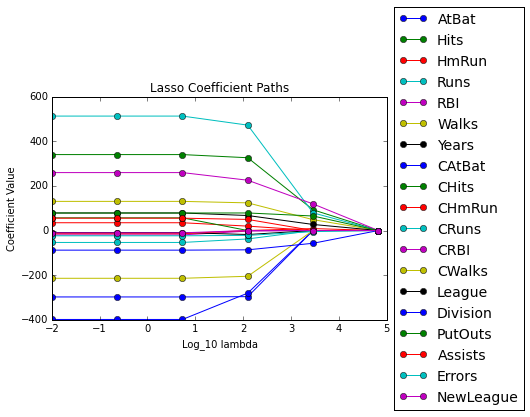

In [22]:
%matplotlib inline
plot_lasso_coef_profiles(warm_start_fista_lam_grid[:,0], warm_start_fista_lam_grid[:,range(2,len(warm_start_fista_lam_grid[0,:]))], hitters_headers)

### Part V - Finally, let's apply both *basic* and *sequential* strong rules to lasso problems on a larger dataset. In both cases, we will exam the shooting algorithm. For the basic rule, we will consider a single $\lambda=2000$ and for the sequential rules case (in which we also apply warm starts), we consider a grid of 5 $\lambda$ values spaced exponentially between $10^{-2}$ and $\lambda_{max}$, where the latter is defined as above

In [23]:
basic_strong_rules_shooting_beta = lasso_shooting_solver_strong_rules(X_news_popularity, Y_news_popularity, 500000, 0.001, True, True)
print basic_strong_rules_shooting_beta

Iter 1 done, l2^2=1945104.413, Loss=5284764058346.713
Iter 2 done, l2^2=590857.406, Loss=5260857651496.244
Iter 3 done, l2^2=98761.096, Loss=5256943439151.207
Iter 4 done, l2^2=65563.009, Loss=5254311979588.823
Iter 5 done, l2^2=48486.965, Loss=5252384439380.261
Iter 6 done, l2^2=37011.275, Loss=5250916630304.140
Iter 7 done, l2^2=28320.656, Loss=5249793883997.399
Iter 8 done, l2^2=21866.430, Loss=5248926986437.235
Iter 9 done, l2^2=17033.854, Loss=5248251570217.719
Iter 10 done, l2^2=12949.414, Loss=5247731627252.818
Iter 11 done, l2^2=9521.715, Loss=5247353744086.782
Iter 12 done, l2^2=7371.701, Loss=5247061498134.020
Iter 13 done, l2^2=5753.584, Loss=5246833400425.856
Iter 14 done, l2^2=4880.556, Loss=5246639207890.038
Iter 15 done, l2^2=3544.266, Loss=5246498693678.499
Iter 16 done, l2^2=2597.602, Loss=5246395709835.168
Iter 17 done, l2^2=1910.297, Loss=5246319974190.472
Iter 18 done, l2^2=1428.360, Loss=5246263344830.962
Iter 19 done, l2^2=1088.005, Loss=5246220208677.346
Iter 20 

In [24]:
# first compute lambda_max
lam_max = 2*np.max(np.abs(np.dot(np.transpose(X_news_popularity),Y_news_popularity)))
print lam_max

101785868.946


#### The following was not converging at the time of submission. In full disclousre, I am unsure of if there is an error in my code or if the run-time was just very long since we consider a path of solutions on a larger dataset.

In [ ]:
beta_warm_shoot_sequential_strong_rules = warm_start_lasso_shooting_solver_strong_rules(X_news_popularity, Y_news_popularity, 0.001, 5, 10.**-2, 
                                                                                        lam_max=9999, apply_sequential_strong_rules=True)
print beta_warm_shoot_sequential_strong_rules

# End Demonstration